 #  <center> YELO BANK TECHNICAL SKILL TEST 🔔

# Task 1 
###### (Use loan_data.xlsx  file for Task 1) 📌




Title | Definition
---|---------
`CUSTOMER_NO`| id of costumer
`BEGIN_DATE` |  open date of loan
`END_DATE` | close date of loan  
`CLOSE_DATE` | actual close date of loan
`BRANCH_NAME` | name of product
`INTEREST_RATE` | loan interest rate(annual)
`BIRTH_DATE` |  birth date of customer
`PRODUCT_NAME` | name of product
`AMOUNT` |  given amount of loan
`REMAIN_AMOUNT` | customer's debt to bank
`CATEGORY` |  cutomer category (GB -good bank / BB- bad bank) 
`GSM_NO` |  Mobile Phone 



 ## <center> Customer Segmentation

##  1. Data cleaning & Preparation 🧹
### Tips for data cleaning : 
 ##### Pay attention  ❗
- Data types
- Null values
- Extreme values
- Duplicates
- Correct telephone number format (ex.: 994752000000 , numbers should be start with 99475, 99476, 99433 )

## 2. EDA ( Exploratory Data Analysis) 📈
### Tips :
1. Yearly and monthly sales amount and count (using pivot_table func.)
2. Active & non-active customer distribution by product names
3. Your approach 🙂 (mandatory)

## 3. Segmentation for loan offer  🙋🏻🙋🏻‍♂️
##### Only these customers are able to take loan:

1. Age between 25 and 64
2. Category not in "BB"
3. Branch name not like "UPA"
4. Don't have active loan or remain amount < 60 %

### After defining your segment follow this steps :

- Split your segment into Target and Test customers
- Test clients should be 10 % of segment
- Use stratified sampling method for choosing test clients
- Show them as by creating a new column named as "TYPE"






# <center> Task 2

#### SQL task  ==> check attached excel file 

# <center> Task 3

## Insight Finding 📝

Analyze and visualize data and present your findings (preferably PPT)

Prepare the business proposal using data set provided in PYTHON task. Final presentation need to include following insights:


1.	Customer Segmentations and their profile (Exp. Customer between age 25-30 majorly set to require loans between X-Y AZN with Z month period)
2.	Top 3 customer segments which can increase sales if targeted properly. (Exp. Students can be targeted during back to school period as they are not targeted properly and have less risk based on data)
3.	The new bank product to increase the sales and cover customers need. ( Exp. Students credit X AZN with Y period can be attractive and cover majority of customer base.)


###### Note: Business proposal need to be part of business story telling within presentation.

### <center> GOOD LUCK!

## <center> THANKS MAN 🤝

# Task 1

## Data cleaning & Preparation 🧹

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [78]:
df = pd.read_excel('loan_data.xlsx')
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO
0,462598,20-03-1984,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,GB,994758000022
1,469638,01-12-1977,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,GB,994758000023
2,489282,18-09-1997,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,GB,994758000025
3,490443,03-01-1987,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,GB,994758000026
4,331469,15-09-1989,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,GB,994758000027
...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,06-06-1970,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,GB,NaN
20070,474877,23-01-1988,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,GB,994767003628
20071,812387,18-01-1998,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,GB,NaN
20072,202641,24-06-1959,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,GB,NaN


In [79]:
df.describe()

,CUSTOMER_NO,BEGIN_DATE,END_DATE,CLOSE_DATE,INTEREST_RATE,AMOUNT,REMAIN_AMOUNT
count,20074.000000,20074,20074,8744,20074.000000,20074.000000,20074.000000
mean,518376.961144,2022-11-27 16:06:58.929958912,2025-07-12 18:27:22.004583168,2023-02-06 19:14:46.001829888,16.226243,9938.329899,4292.121747
min,12702.000000,2021-01-14 00:00:00,2024-02-15 00:00:00,2021-03-09 00:00:00,4.000000,300.000000,0.000000
25%,404840.500000,2022-05-12 00:00:00,2024-09-12 00:00:00,2022-09-09 00:00:00,14.900000,4000.000000,0.000000
50%,519707.500000,2023-01-10 00:00:00,2025-05-19 00:00:00,2023-04-06 00:00:00,16.000000,7000.000000,1015.275000
75%,665035.000000,2023-08-04 00:00:00,2026-03-16 00:00:00,2023-08-31 00:00:00,17.000000,13000.000000,5787.732500
max,824158.000000,2023-12-30 00:00:00,2028-11-30 00:00:00,2023-12-30 00:00:00,29.000000,200000.000000,105080.830000
std,184675.378399,NaN,NaN,NaN,2.305223,9229.274894,7251.010323


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20074 entries, 0 to 20073
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUSTOMER_NO    20074 non-null  int64         
 1   BIRTH_DATE     20074 non-null  object        
 2   BEGIN_DATE     20074 non-null  datetime64[ns]
 3   END_DATE       20074 non-null  datetime64[ns]
 4   CLOSE_DATE     8744 non-null   datetime64[ns]
 5   BRANCH_NAME    20074 non-null  object        
 6   INTEREST_RATE  20074 non-null  float64       
 7   PRODUCT_NAME   20074 non-null  object        
 8   AMOUNT         20074 non-null  float64       
 9   REMAIN_AMOUNT  20074 non-null  float64       
 10  CATEGORY       20074 non-null  object        
 11  GSM_NO         19036 non-null  object        
dtypes: datetime64[ns](3), float64(3), int64(1), object(5)
memory usage: 1.8+ MB


In [81]:
df.isna().sum()

CUSTOMER_NO          0
BIRTH_DATE           0
BEGIN_DATE           0
END_DATE             0
CLOSE_DATE       11330
BRANCH_NAME          0
INTEREST_RATE        0
PRODUCT_NAME         0
AMOUNT               0
REMAIN_AMOUNT        0
CATEGORY             0
GSM_NO            1038
dtype: int64

In [82]:
df.dtypes

CUSTOMER_NO               int64
BIRTH_DATE               object
BEGIN_DATE       datetime64[ns]
END_DATE         datetime64[ns]
CLOSE_DATE       datetime64[ns]
BRANCH_NAME              object
INTEREST_RATE           float64
PRODUCT_NAME             object
AMOUNT                  float64
REMAIN_AMOUNT           float64
CATEGORY                 object
GSM_NO                   object
dtype: object

In [83]:
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    print(f"\nSample values in {col}:")
    print(df[col].head())


Sample values in BIRTH_DATE:
0    20-03-1984
1    01-12-1977
2    18-09-1997
3    03-01-1987
4    15-09-1989
Name: BIRTH_DATE, dtype: object

Sample values in BEGIN_DATE:
0   2021-05-04
1   2021-06-14
2   2021-09-01
3   2021-09-06
4   2021-09-10
Name: BEGIN_DATE, dtype: datetime64[ns]

Sample values in END_DATE:
0   2024-05-04
1   2025-03-14
2   2024-09-01
3   2024-09-06
4   2024-09-10
Name: END_DATE, dtype: datetime64[ns]

Sample values in CLOSE_DATE:
0          NaT
1   2023-09-29
2   2022-03-16
3   2023-05-18
4   2021-12-06
Name: CLOSE_DATE, dtype: datetime64[ns]


In [84]:
null_analysis = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

null_summary = pd.DataFrame({
    'null count': null_analysis,
    'null percentage': null_percentages
})
print(null_summary)

               null count  null percentage
CUSTOMER_NO             0             0.00
BIRTH_DATE              0             0.00
BEGIN_DATE              0             0.00
END_DATE                0             0.00
CLOSE_DATE          11330            56.44
BRANCH_NAME             0             0.00
INTEREST_RATE           0             0.00
PRODUCT_NAME            0             0.00
AMOUNT                  0             0.00
REMAIN_AMOUNT           0             0.00
CATEGORY                0             0.00
GSM_NO               1038             5.17


In [85]:
def analyze_phone_numbers(df):
    valid_phones = df['GSM_NO'].dropna().astype(str)
    prefix_99475 = valid_phones.str.startswith('99475').sum()
    prefix_99476 = valid_phones.str.startswith('99476').sum()
    prefix_99433 = valid_phones.str.startswith('99433').sum()
    total_phones = len(df)
    missing_phones = df['GSM_NO'].isna().sum()
    valid_format = prefix_99475 + prefix_99476 + prefix_99433
    invalid_format = len(valid_phones) - valid_format

    print("=== Phone Number Analysis ===")
    print(f"Total records: {total_phones}")
    print(f"Missing numbers: {missing_phones}")
    print(f"Valid format: {valid_format}")
    print(f"Invalid format: {invalid_format}")
    print("\nPrefix Distribution:")
    print(f"99475 prefix: {prefix_99475}")
    print(f"99476 prefix: {prefix_99476}")
    print(f"99433 prefix: {prefix_99433}")

analyze_phone_numbers(df)

=== Phone Number Analysis ===
Total records: 20074
Missing numbers: 1038
Valid format: 18819
Invalid format: 217

Prefix Distribution:
99475 prefix: 7231
99476 prefix: 5837
99433 prefix: 5751


In [86]:
def validate_phone(number):
    if pd.isna(number):
        return False
    number = str(number)
    return (number.startswith('99475') or 
            number.startswith('99476') or 
            number.startswith('99433'))

df['VALID_PHONE'] = df['GSM_NO'].apply(validate_phone)

In [87]:
customer_loan_counts = df['CUSTOMER_NO'].value_counts()
customers_with_multiple_loans = customer_loan_counts[customer_loan_counts > 1]

print(f"unique customers: {len(customer_loan_counts)}")
print(f"multiple loan customers: {len(customers_with_multiple_loans)}")
print(customer_loan_counts.value_counts().sort_index())

unique customers: 17160
multiple loan customers: 2398
count
1     14762
2      2018
3       299
4        55
5        16
6         5
7         1
8         2
9         1
17        1
Name: count, dtype: int64


=== outliers ===

AMOUNT statistics:
count     20074.000000
mean       9938.329899
std        9229.274894
min         300.000000
25%        4000.000000
50%        7000.000000
75%       13000.000000
max      200000.000000
Name: AMOUNT, dtype: float64


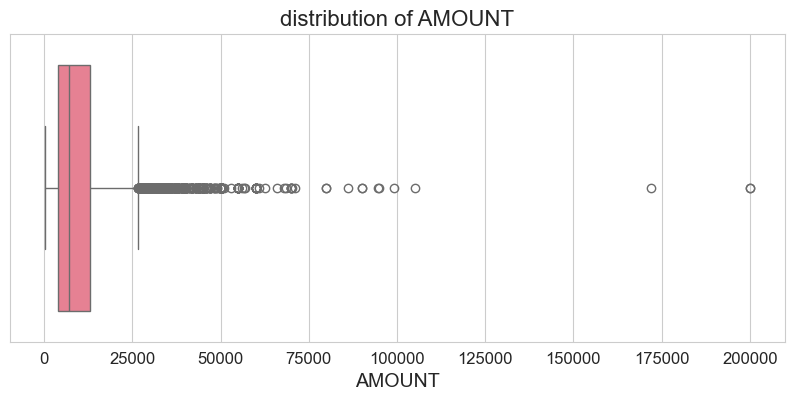


INTEREST_RATE statistics:
count    20074.000000
mean        16.226243
std          2.305223
min          4.000000
25%         14.900000
50%         16.000000
75%         17.000000
max         29.000000
Name: INTEREST_RATE, dtype: float64


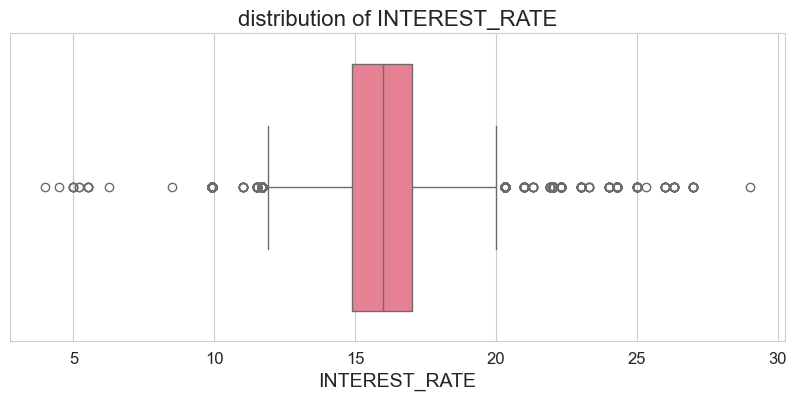


REMAIN_AMOUNT statistics:
count     20074.000000
mean       4292.121747
std        7251.010323
min           0.000000
25%           0.000000
50%        1015.275000
75%        5787.732500
max      105080.830000
Name: REMAIN_AMOUNT, dtype: float64


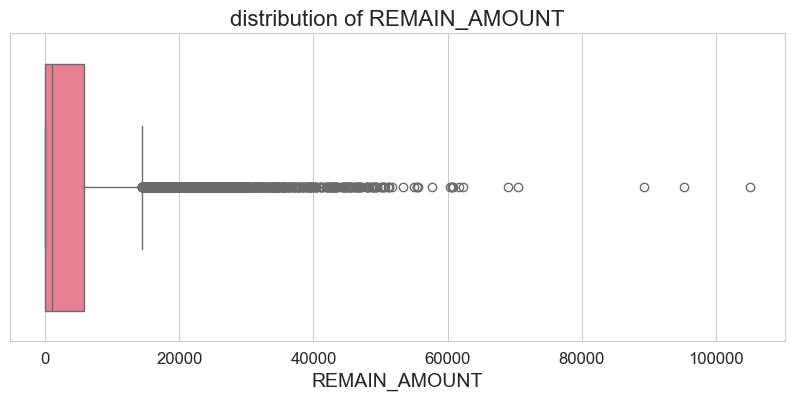

In [88]:
numeric_columns = ['AMOUNT', 'INTEREST_RATE', 'REMAIN_AMOUNT']

print("=== outliers ===")
for col in numeric_columns:
    print(f"\n{col} statistics:")
    print(df[col].describe())
    
    plt.figure(figsize=(10, 4))
    plt.title(f"distribution of {col}")
    sns.boxplot(x=df[col])
    plt.show()

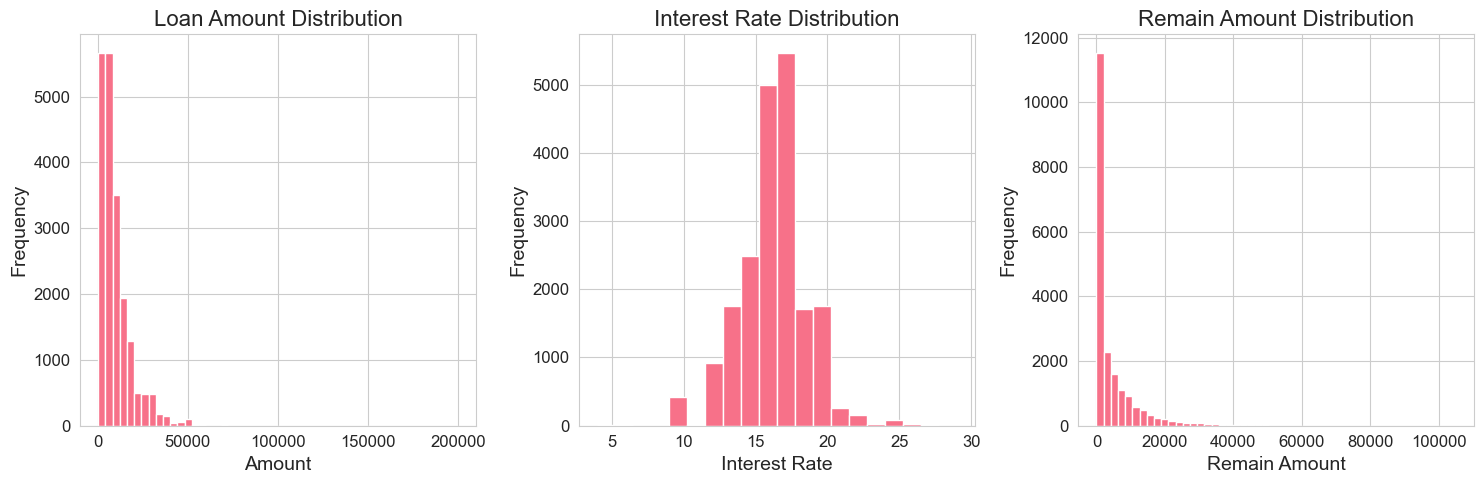

In [89]:
plt.figure(figsize=(15, 5))

# amount 
plt.subplot(1, 3, 1)
plt.hist(df['AMOUNT'], bins=50)
plt.title('Loan Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# interest rate
plt.subplot(1, 3, 2)
plt.hist(df['INTEREST_RATE'], bins=20)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

# remain amount
plt.subplot(1, 3, 3)
plt.hist(df['REMAIN_AMOUNT'], bins=50)
plt.title('Remain Amount Distribution')
plt.xlabel('Remain Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [90]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))][column]

# outlier summary
for column in ['AMOUNT', 'INTEREST_RATE', 'REMAIN_AMOUNT']:
    outliers = identify_outliers(df, column)
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")


Outliers in AMOUNT:
Number of outliers: 1162
Percentage of outliers: 5.79%

Outliers in INTEREST_RATE:
Number of outliers: 1825
Percentage of outliers: 9.09%

Outliers in REMAIN_AMOUNT:
Number of outliers: 1624
Percentage of outliers: 8.09%


In [91]:
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Missing Phone Numbers',
        'Invalid Phone Format',
        'Customers with Multiple Loans',
        'Min Loan Amount',
        'Max Loan Amount',
        'Min Interest Rate',
        'Max Interest Rate',
        'Min Remain Amount',
        'Max Remain Amount'
    ],
    'Value': [
        len(df),
        df['GSM_NO'].isna().sum(),
        len(df['GSM_NO'].dropna()) - (df['GSM_NO'].astype(str).str.startswith('99475').sum() + 
                                     df['GSM_NO'].astype(str).str.startswith('99476').sum() + 
                                     df['GSM_NO'].astype(str).str.startswith('99433').sum()),
        len(customers_with_multiple_loans),
        df['AMOUNT'].min(),
        df['AMOUNT'].max(),
        df['INTEREST_RATE'].min(),
        df['INTEREST_RATE'].max(),
        df['REMAIN_AMOUNT'].min(),
        df['REMAIN_AMOUNT'].max()
    ]
})

pd.DataFrame(summary_stats)

,Metric,Value
0,Total Records,20074.00
1,Missing Phone Numbers,1038.00
2,Invalid Phone Format,217.00
3,Customers with Multiple Loans,2398.00
4,Min Loan Amount,300.00
5,Max Loan Amount,200000.00
6,Min Interest Rate,4.00
7,Max Interest Rate,29.00
8,Min Remain Amount,0.00
9,Max Remain Amount,105080.83


## EDA ( Exploratory Data Analysis) 📈

In [92]:
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

### Yearly and monthly sales analysis using pivot_table


In [93]:
df['Year'] = df['BEGIN_DATE'].dt.year
df['Month'] = df['BEGIN_DATE'].dt.month

#  pivot table 
yearly_analysis = pd.pivot_table(df, 
                               values=['AMOUNT', 'CUSTOMER_NO'],
                               index='Year',
                               aggfunc={'AMOUNT': 'sum', 'CUSTOMER_NO': 'count'})
yearly_analysis.columns = ['Total Amount', 'Number of Loans']
print("Yearly Analysis:")
print(yearly_analysis)

# pivot table for monthly analysis
monthly_analysis = pd.pivot_table(df, 
                                values=['AMOUNT', 'CUSTOMER_NO'],
                                index=['Year', 'Month'],
                                aggfunc={'AMOUNT': 'sum', 'CUSTOMER_NO': 'count'})
monthly_analysis.columns = ['Total Amount', 'Number of Loans']

Yearly Analysis:
      Total Amount  Number of Loans
Year                               
2021    32825320.0             3098
2022    64071831.0             6837
2023   102604883.4            10139


### active & non-active customer distribution by product names

loan status distribution by product:
Loan_Status               Active  Closed
PRODUCT_NAME                            
İstehlak kredit (Cash)      7128    7193
İstehlak kredit - Online    3674    1311
İstehlak krediti              21      22
Əmanətçi krediti             507     218


<Figure size 1200x600 with 0 Axes>

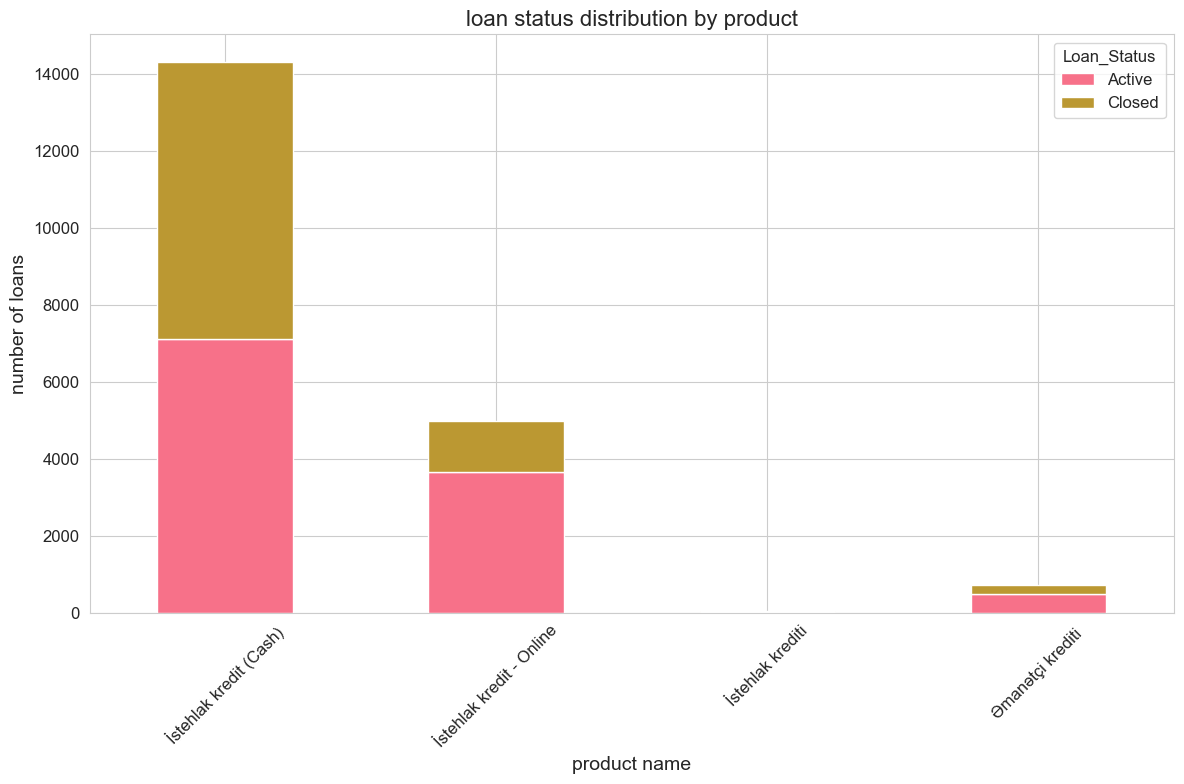

In [94]:
df['Loan_Status'] = 'Active'
df.loc[df['CLOSE_DATE'].notna(), 'Loan_Status'] = 'Closed'

# pivot table for loan status by product
loan_status_by_product = pd.pivot_table(df,
                                      values='CUSTOMER_NO',
                                      index='PRODUCT_NAME',
                                      columns='Loan_Status',
                                      aggfunc='count',
                                      fill_value=0)

print("loan status distribution by product:")
print(loan_status_by_product)

# visualization
plt.figure(figsize=(12, 6))
loan_status_by_product.plot(kind='bar', stacked=True)
plt.title('loan status distribution by product')
plt.xlabel('product name')
plt.ylabel('number of loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### additional analysis - interest rate distribution by product

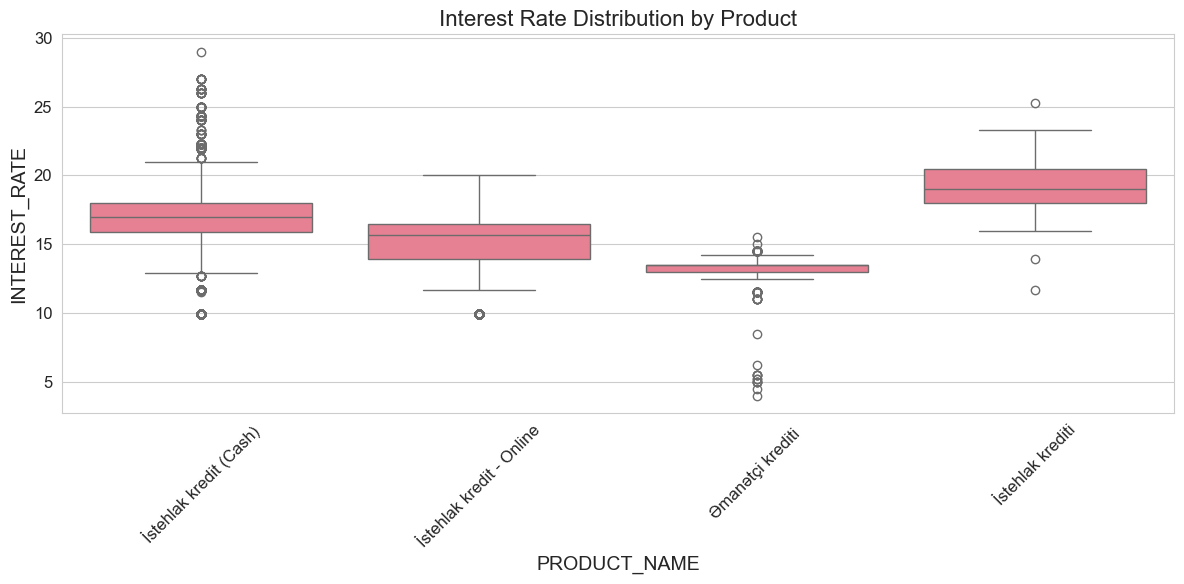


average loan amount by product:
                                  mean  count
PRODUCT_NAME                                 
İstehlak kredit (Cash)    10082.026534  14321
İstehlak kredit - Online   9457.633581   4985
İstehlak krediti          35473.255814     43
Əmanətçi krediti           8890.591724    725


In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PRODUCT_NAME', y='INTEREST_RATE')
plt.xticks(rotation=45)
plt.title('Interest Rate Distribution by Product')
plt.tight_layout()
plt.show()

# average loan amount
avg_amount_by_product = df.groupby('PRODUCT_NAME')['AMOUNT'].agg(['mean', 'count'])
print("\naverage loan amount by product:")
print(avg_amount_by_product)

### customer segmentation

In [96]:
# age
df['AGE'] = (datetime.now() - df['BIRTH_DATE']).dt.days / 365.25

def get_age_segment(age):
    if age < 25:
        return 'Young (<25)'
    elif age <= 30:
        return 'Young Professional (25-30)'
    elif age <= 40:
        return 'Early Career (31-40)'
    elif age <= 50:
        return 'Mid Career (41-50)'
    elif age <= 64:
        return 'Late Career (51-64)'
    else:
        return 'Senior (65+)'

df['AGE_SEGMENT'] = df['AGE'].apply(get_age_segment)


df['REMAIN_PERCENTAGE'] = (df['REMAIN_AMOUNT'] / df['AMOUNT']) * 100

# criteria
eligible_customers = df[
    (df['AGE'] >= 25) & 
    (df['AGE'] <= 64) &
    (df['CATEGORY'] != 'BB') &
    (df['BRANCH_NAME'] != 'UPA') &
    ((df['Loan_Status'] == 'Closed') | (df['REMAIN_PERCENTAGE'] < 60))
].copy()

print("all customers:", len(df))
print("eligible customers:", len(eligible_customers))

all customers: 20074
eligible customers: 11615


### prepare for stratified sampling

In [97]:
# stratification features
eligible_customers['AGE_GROUP'] = pd.qcut(eligible_customers['AGE'], q=5, labels=['A', 'B', 'C', 'D', 'E'])
eligible_customers['AMOUNT_GROUP'] = pd.qcut(eligible_customers['AMOUNT'], q=5, labels=['1', '2', '3', '4', '5'])

# for better stratification I should combine features
eligible_customers['STRAT_GROUP'] = eligible_customers['AGE_GROUP'].astype(str) + eligible_customers['AMOUNT_GROUP'].astype(str)

# target and test groups
target_group, test_group = train_test_split(
    eligible_customers,
    test_size=0.1,
    stratify=eligible_customers['STRAT_GROUP'],
    random_state=42
)

target_group['TYPE'] = 'TARGET'
test_group['TYPE'] = 'TEST'

# combine and clean
final_df = pd.concat([target_group, test_group])
final_df = final_df.drop(['AGE_GROUP', 'AMOUNT_GROUP', 'STRAT_GROUP'], axis=1)

print("\nfinal distribution:")
print(final_df['TYPE'].value_counts(normalize=True))

# sample results
print("\nsample of segmented customers:")
print(final_df[['CUSTOMER_NO', 'AGE', 'AMOUNT', 'TYPE']].head(10))

# statistica by segment
print("\nsegment statistica:")
print(final_df.groupby('TYPE').agg({
    'AGE': ['count', 'mean'],
    'AMOUNT': ['mean', 'min', 'max'],
    'INTEREST_RATE': 'mean'
}).round(2))


final distribution:
TYPE
TARGET    0.899957
TEST      0.100043
Name: proportion, dtype: float64

sample of segmented customers:
       CUSTOMER_NO        AGE   AMOUNT    TYPE
13571       603018  61.932923   7000.0  TARGET
2175        263549  32.432580   8000.0  TARGET
6554        565979  36.167009  40000.0  TARGET
2283        402429  35.783710   5000.0  TARGET
10744       475573  30.146475   8000.0  TARGET
7750        491933  57.913758   7950.0  TARGET
16734       403171  55.115674   4000.0  TARGET
10941       461588  36.325804  11000.0  TARGET
19900       561904  35.843943  15000.0  TARGET
16842       672905  33.746749   2700.0  TARGET

segment statistica:
          AGE          AMOUNT                  INTEREST_RATE
        count   mean     mean    min       max          mean
TYPE                                                        
TARGET  10453  41.12  9414.56  300.0  200000.0         16.81
TEST     1162  41.09  9433.96  300.0   60000.0         16.92


In [98]:
final_df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,VALID_PHONE,Year,Month,Loan_Status,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE,TYPE
13571,603018,1963-02-10,2022-06-01,2025-06-01,2023-03-30,MR,17.0,İstehlak kredit (Cash),7000.0,0.0,GB,994334002393,True,2022,6,Closed,61.932923,Late Career (51-64),0.0,TARGET
2175,263549,1992-08-11,2022-12-14,2025-12-14,2023-12-07,28M,17.0,İstehlak kredit (Cash),8000.0,0.0,GB,994758002187,True,2022,12,Closed,32.432580,Early Career (31-40),0.0,TARGET
6554,565979,1988-11-16,2023-02-16,2027-02-16,2023-04-26,DIGITAL,18.0,İstehlak kredit (Cash),40000.0,0.0,GB,994767003347,True,2023,2,Closed,36.167009,Early Career (31-40),0.0,TARGET
2283,402429,1989-04-05,2021-10-19,2024-10-19,2022-11-16,28M,22.0,İstehlak kredit (Cash),5000.0,0.0,GB,994758002291,True,2021,10,Closed,35.783710,Early Career (31-40),0.0,TARGET
10744,475573,1994-11-24,2021-07-06,2024-07-06,2022-08-22,M,20.3,İstehlak kredit (Cash),8000.0,0.0,GB,994334000042,True,2021,7,Closed,30.146475,Early Career (31-40),0.0,TARGET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,617914,1992-11-14,2022-06-29,2025-06-29,2023-10-02,28M,16.0,İstehlak kredit - Online,10000.0,0.0,GB,994758002447,True,2022,6,Closed,32.172485,Early Career (31-40),0.0,TEST
3728,447003,1986-01-01,2022-07-18,2025-07-18,2022-09-27,6S,16.5,İstehlak kredit (Cash),25200.0,0.0,GB,994758003683,True,2022,7,Closed,39.041752,Early Career (31-40),0.0,TEST
10854,330935,1986-09-03,2021-04-29,2024-04-29,2021-10-11,M,19.9,İstehlak kredit (Cash),5000.0,0.0,GB,994758000090,True,2021,4,Closed,38.370979,Early Career (31-40),0.0,TEST
17771,508460,1975-12-18,2021-11-05,2024-11-05,2023-04-19,N,18.0,İstehlak kredit (Cash),7000.0,0.0,GB,994334004185,True,2021,11,Closed,49.081451,Mid Career (41-50),0.0,TEST


In [99]:
final_df.groupby('TYPE')['AGE'].describe()


,count,mean,std,min,25%,50%,75%,max
TYPE,,,,,,,,
TARGET,10453.0,41.122729,10.127982,25.004791,33.065024,38.932238,48.038330,63.997262
TEST,1162.0,41.088282,10.064829,25.043121,32.920602,38.910335,48.052019,63.967146


In [100]:
final_df.groupby('TYPE')['AMOUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
TYPE,,,,,,,,
TARGET,10453.0,9414.559017,8649.550539,300.0,4000.0,6900.0,12000.0,200000.0
TEST,1162.0,9433.961274,8334.313155,300.0,3725.0,7000.0,12000.0,60000.0


In [101]:
pd.crosstab(final_df['TYPE'], final_df['PRODUCT_NAME'], normalize='index')

PRODUCT_NAME,İstehlak kredit (Cash),İstehlak kredit - Online,İstehlak krediti,Əmanətçi krediti
TYPE,,,,
TARGET,0.814886,0.155458,0.002296,0.027361
TEST,0.823580,0.149742,0.002582,0.024096


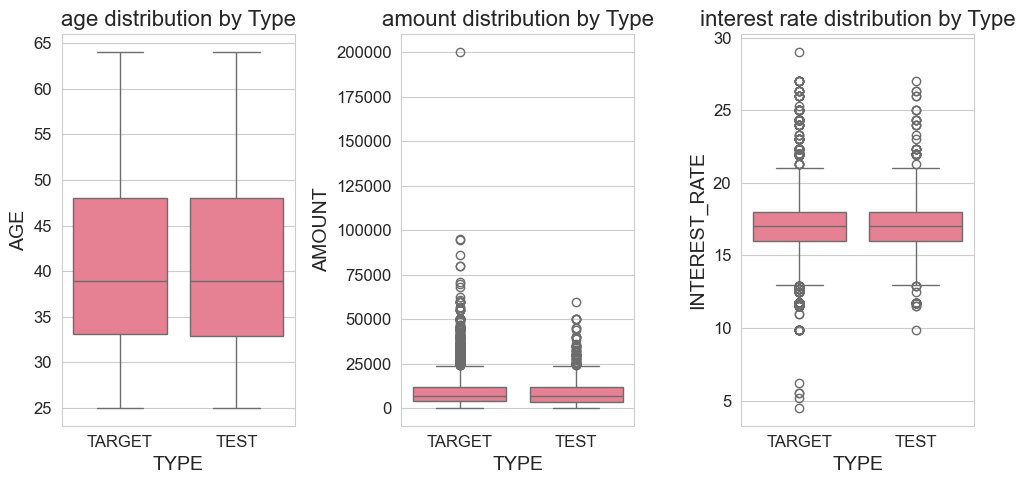

In [102]:
plt.figure(figsize=(10, 5))

# age 
plt.subplot(1, 3, 1)
sns.boxplot(data=final_df, x='TYPE', y='AGE')
plt.title('age distribution by Type')

# amount 
plt.subplot(1, 3, 2)
sns.boxplot(data=final_df, x='TYPE', y='AMOUNT')
plt.title('amount distribution by Type')

# interest rate 
plt.subplot(1, 3, 3)
sns.boxplot(data=final_df, x='TYPE', y='INTEREST_RATE')
plt.title('interest rate distribution by Type')

plt.tight_layout()
plt.show()

# Task 2

In [103]:
# from pandasql import sqldf

# customer_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='CUSTOMER')
# credit_contracts_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='CREDIT_CONTRACTS')
# product_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='PRODUCT')
# transaction_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='TRANSACTION')

# monthly_income = customer_df[['CIF', 'AVERAGE_SALARY', 'AVERAGE_PENSION']].copy()
# monthly_income['MONTHLY_INCOME'] = monthly_income[['AVERAGE_SALARY', 'AVERAGE_PENSION']].fillna(0).max(axis=1)
# result = monthly_income[['CIF', 'MONTHLY_INCOME']]


# def sql_query(query):
#     return sqldf(query, globals())

# query = """
# SELECT 
#     CIF,
#     AVERAGE_SALARY + AVERAGE_PENSION as MONTHLY_INCOME
# FROM customer_df
# """

# result = sql_query(query)
# result

In [104]:
import duckdb

excel_file = 'DATA_ANALYTICS_EXAM_SQL.XLSX'
customer = pd.read_excel(excel_file, sheet_name='CUSTOMER')
credit_contracts = pd.read_excel(excel_file, sheet_name='CREDIT_CONTRACTS')
product = pd.read_excel(excel_file, sheet_name='PRODUCT')
transaction = pd.read_excel(excel_file, sheet_name='TRANSACTION')

con = duckdb.connect()
con.register('customer', customer)
con.register('credit_contracts', credit_contracts)
con.register('product', product)
con.register('transaction', transaction)

In [105]:
# Pension Customers with Active GTKR Products
# This query finds all pensioners who have an active GTKR product. It:

# Joins customer and credit_contracts tables using customer ID (cif)
# Filters for pension income customers
# Filters for GTKR products that are active

query1 = """
select *  from customer c 
 inner join credit_contracts cc
    on c.cif = cc.cif
 where c.income_type = 'Pension'
   and cc.product_code = 'GTKR'
   and cc.status = 'ACTIVE';
"""
result1 = con.execute(query1).df()
print("Query 1 Result:")
result1.head()

Query 1 Result:


,CIF,BIRTH_DATE,GENDER,REGISTERED_CITY_REGION,INCOME_TYPE,AVERAGE_SALARY,AVERAGE_PENSION,CIF_1,CONTRACT_NUMBER,PRODUCT_CODE,STATUS,AMOUNT/LIMIT,INTEREST,DURATION,OPEN_DATE,CLOSE_DATE,ACCOUNT_NUMBER
0,1000094,1986-04-02,Male,ZAQATALA,Pension,0,346,1000094,GTKR0002,GTKR,ACTIVE,1400,27,36,2020-08-14,2023-08-14,NaN
1,1000041,1961-02-02,Female,ASTARA,Pension,0,368,1000041,GTKR0004,GTKR,ACTIVE,8100,28,48,2020-09-21,2024-09-20,NaN
2,1000052,1989-04-15,Male,CEBRAYIL,Pension,0,155,1000052,GTKR0005,GTKR,ACTIVE,9900,21,12,2021-02-23,2022-02-23,NaN
3,1000001,1962-09-09,Male,GEDEBEY,Pension,0,257,1000001,GTKR0008,GTKR,ACTIVE,3700,21,12,2023-09-21,2024-09-20,NaN
4,1000001,1962-09-09,Male,GEDEBEY,Pension,0,257,1000001,GTKR0013,GTKR,ACTIVE,5600,26,24,2022-09-13,2024-09-12,NaN


In [106]:
# Account Number Pattern Search

# This query finds accounts that:

# Have BRED or BBLK products
# Have both 9 and 1 in their account number
# But 9 and 1 cannot be adjacent (no "91" or "19")

query2 = """
SELECT * 
FROM credit_contracts cc
WHERE product_code IN ('BRED', 'BBLK')
    AND CAST(cc.account_number AS VARCHAR) LIKE '%9%'
    AND CAST(cc.account_number AS VARCHAR) LIKE '%1%'
    AND CAST(cc.account_number AS VARCHAR) NOT LIKE '%91%'
    AND CAST(cc.account_number AS VARCHAR) NOT LIKE '%19%';
"""
result2 = con.execute(query2).df()
print("Query 2 Result:")
result2.head()

Query 2 Result:


,CIF,CONTRACT_NUMBER,PRODUCT_CODE,STATUS,AMOUNT/LIMIT,INTEREST,DURATION,OPEN_DATE,CLOSE_DATE,ACCOUNT_NUMBER
0,1000018,BRED0002,BRED,ACTIVE,2300,25,36,2019-11-29,2022-11-28,3.881791e+09
1,1000084,BRED0004,BRED,ACTIVE,3900,25,36,2020-08-02,2023-08-02,3.881791e+09
2,1000012,BRED0005,BRED,ACTIVE,3700,25,36,2019-12-29,2022-12-28,3.881791e+09
3,1000089,BRED0010,BRED,ACTIVE,3700,25,36,2021-07-01,2024-06-30,3.881790e+09
4,1000093,BBLK0003,BBLK,ACTIVE,5500,25,36,2020-07-21,2023-07-21,3.881791e+09


In [107]:
# POS Transactions by Region
# Counts POS transactions by region
# Only for BRED and BBLK products
# Groups results by customer's registered city/region
 
query3 = """
select c.registered_city_region, count(*)
  from customer c
 inner join credit_contracts cc
    on c.cif = cc.cif
 inner join transaction t
    on cc.account_number = t.account_number
 where cc.product_code in ('BRED', 'BBLK')
   and t.transaction_type = 'POS'
 group by c.registered_city_region;
"""
result3 = con.execute(query3).df()
print("Query 3 Result:")
result3.head()

Query 3 Result:


,REGISTERED_CITY_REGION,count_star()
0,GOYGOL,7
1,GEDEBEY,5
2,BARDA,3
3,KURDAMIR,1
4,KHACHMAZ,3


In [108]:
# First Credit Contract

# The earliest credit contract for each customer
# Returns the open date, customer ID
# And the contract number for that first contract
# The earliest credit contract for each customer with their first contract number

query4 = """
WITH FirstContracts AS (
    SELECT 
        cif,
        open_date,
        contract_number,
        ROW_NUMBER() OVER (PARTITION BY cif ORDER BY open_date) as rn
    FROM credit_contracts
)
SELECT 
    open_date as first_loan_date,
    cif,
    contract_number as muqavile_nomresi
FROM FirstContracts
WHERE rn = 1
ORDER BY cif;
"""
result4 = con.execute(query4).df()
print("Query 4 Result:")
result4.head()

Query 4 Result:


,first_loan_date,CIF,muqavile_nomresi
0,2021-04-22,1000001,GTKR0039
1,2023-02-09,1000002,GTKR0064
2,2013-01-25,1000003,BBLK0039
3,2019-02-23,1000005,BBLK0040
4,2017-06-23,1000006,GTKR0038


In [109]:
# Top 3 Customers by Transaction Amount per Income Type
# Uses a CTE (Common Table Expression) to rank customers
# Groups by income type and sums transaction amounts
# Uses ROW_NUMBER() to rank customers within each income type
# Returns the top 3 customers by transaction amount for each income type

query5 = """
WITH FirstLoans AS (
    SELECT 
        cif,
        open_date,
        contract_number,
        ROW_NUMBER() OVER (PARTITION BY cif ORDER BY open_date) as rn
    FROM credit_contracts
)
SELECT 
    fl.open_date as first_loan_date,
    fl.cif,
    fl.contract_number as muqavile_nomresi
FROM FirstLoans fl
WHERE rn = 1;
"""
result5 = con.execute(query5).df()
print("Query 5 Result:")
result5.head()

Query 5 Result:


,first_loan_date,CIF,muqavile_nomresi
0,2022-04-03,1000033,GTKR0014
1,2022-07-25,1000078,GTKR0043
2,2017-06-23,1000006,GTKR0038
3,2020-10-20,1000034,BRED0009
4,2015-04-11,1000073,BBLK0008


In [110]:
# CIF and monthly income
query6 = """
SELECT 
    CIF,
    AVERAGE_SALARY + AVERAGE_PENSION as MONTHLY_INCOME
FROM customer
"""
result6 = con.execute(query6).df()
print("Query 6 Result:")
result6.head()

Query 6 Result:


,CIF,MONTHLY_INCOME
0,1000001,257
1,1000002,1033
2,1000003,488
3,1000004,1860
4,1000005,1654


In [111]:
# Average product duration
query7 = """
SELECT 
    p.PRODUCT_NAME,
    AVG(DATEDIFF('month', cc.OPEN_DATE, cc.CLOSE_DATE)) as AVG_MONTHS
FROM product p
JOIN credit_contracts cc ON p.PRODUCT_CODE = cc.PRODUCT_CODE
WHERE cc.CLOSE_DATE IS NOT NULL
GROUP BY p.PRODUCT_NAME
"""
result7 = con.execute(query7).df()
print("Query 7 Result:")
result7


Query 7 Result:


,PRODUCT_NAME,AVG_MONTHS
0,Visa Black,36.000000
1,Gündəlik Tələbat,28.957143
2,Visa Red,35.900000


In [140]:
# Customers with 2+ products by region
query8 = """
WITH CustomerProducts AS (
    SELECT 
        c.CIF,
        c.REGISTERED_CITY_REGION,
        COUNT(DISTINCT cc.PRODUCT_CODE) as PRODUCT_COUNT
    FROM customer c
    JOIN credit_contracts cc ON c.CIF = cc.CIF
    WHERE cc.STATUS = 'ACTIVE'
    GROUP BY c.CIF, c.REGISTERED_CITY_REGION
    HAVING COUNT(DISTINCT cc.PRODUCT_CODE) >= 2
)
SELECT 
    REGISTERED_CITY_REGION,
    COUNT(*) as CUSTOMER_COUNT
FROM CustomerProducts
GROUP BY REGISTERED_CITY_REGION
"""
result8 = con.execute(query8).df()
print("Query 8 Result:")
result8

Query 8 Result:


,REGISTERED_CITY_REGION,CUSTOMER_COUNT
0,GAKH,1
1,GOBUSTAN,1
2,KHACHMAZ,1
3,SIYAZAN,1
4,BAKU,5
5,AGJABADI,2
6,BEYLAQAN,1
7,ZAQATALA,1
8,CALILABAD,1


In [113]:
# Last transaction by customer
query9 = """
WITH RankedTransactions AS (
    SELECT 
        c.CIF,
        t.TRANSACTION_TYPE,
        t.AMOUNT,
        t.DATE,
        ROW_NUMBER() OVER (PARTITION BY c.CIF ORDER BY t.DATE DESC) as rn
    FROM customer c
    JOIN credit_contracts cc ON c.CIF = cc.CIF
    JOIN transaction t ON cc.ACCOUNT_NUMBER = t.ACCOUNT_NUMBER
)
SELECT 
    CIF,
    TRANSACTION_TYPE,
    AMOUNT,
    DATE
FROM RankedTransactions
WHERE rn = 1
"""
result9 = con.execute(query9).df()
print("Query 9 Result:")
result9.head()

Query 9 Result:


,CIF,TRANSACTION_TYPE,AMOUNT,DATE
0,1000012,Cash,594,2021-09-12
1,1000062,Cash,119,2021-09-15
2,1000035,Cash,252,2021-07-28
3,1000038,Taksit,298,2021-08-14
4,1000044,Online,698,2021-09-09


In [139]:
# Birkart customers with transactions but no installments
query10 = """
SELECT DISTINCT 
    c.CIF,
    c.INCOME_TYPE,
    c.REGISTERED_CITY_REGION
FROM customer c
INNER JOIN credit_contracts cc ON c.CIF = cc.CIF
INNER JOIN transaction t ON cc.ACCOUNT_NUMBER = t.ACCOUNT_NUMBER
WHERE cc.PRODUCT_CODE in ('BRED','BBLK') 
AND NOT EXISTS (
    SELECT 1
    FROM customer c2
    INNER JOIN credit_contracts cc2 ON c2.CIF = cc2.CIF
    INNER JOIN transaction t2 ON cc2.ACCOUNT_NUMBER = t2.ACCOUNT_NUMBER
    WHERE t2.TRANSACTION_TYPE = 'Taksit'
    AND c2.CIF = c.CIF
)
"""
result10 = con.execute(query10).df()
print("Query 10 Result:")
result10

Query 10 Result:


,CIF,INCOME_TYPE,REGISTERED_CITY_REGION
0,1000013,Pension,AGJABADI
1,1000008,Pension,BAKU
2,1000073,Salary,GEDEBEY


In [141]:
con.close()

# Task 3

## Insight Finding 📝

In [116]:
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,VALID_PHONE,Year,Month,Loan_Status,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,GB,994758000022,True,2021,5,Active,40.826831,Mid Career (41-50),32.522500
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,GB,994758000023,True,2021,6,Closed,47.126626,Mid Career (41-50),0.000000
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,GB,994758000025,True,2021,9,Closed,27.329227,Young Professional (25-30),0.000000
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,GB,994758000026,True,2021,9,Closed,38.036961,Early Career (31-40),0.000000
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,GB,994758000027,True,2021,9,Closed,35.337440,Early Career (31-40),0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,GB,NaN,False,2021,12,Closed,54.614648,Late Career (51-64),0.000000
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,GB,994767003628,True,2023,9,Active,36.982888,Early Career (31-40),94.092941
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,GB,NaN,False,2023,12,Active,26.995209,Young Professional (25-30),96.785800
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,GB,NaN,False,2023,8,Active,65.566051,Senior (65+),54.034000


In [117]:
df['LOAN_DURATION'] = ((df['END_DATE'] - df['BEGIN_DATE']).dt.days / 30).round()
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,VALID_PHONE,Year,Month,Loan_Status,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE,LOAN_DURATION
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,GB,994758000022,True,2021,5,Active,40.826831,Mid Career (41-50),32.522500,37.0
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,GB,994758000023,True,2021,6,Closed,47.126626,Mid Career (41-50),0.000000,46.0
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,GB,994758000025,True,2021,9,Closed,27.329227,Young Professional (25-30),0.000000,37.0
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,GB,994758000026,True,2021,9,Closed,38.036961,Early Career (31-40),0.000000,37.0
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,GB,994758000027,True,2021,9,Closed,35.337440,Early Career (31-40),0.000000,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,GB,NaN,False,2021,12,Closed,54.614648,Late Career (51-64),0.000000,37.0
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,GB,994767003628,True,2023,9,Active,36.982888,Early Career (31-40),94.092941,37.0
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,GB,NaN,False,2023,12,Active,26.995209,Young Professional (25-30),96.785800,24.0
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,GB,NaN,False,2023,8,Active,65.566051,Senior (65+),54.034000,11.0


In [118]:
df['IS_ACTIVE'] = df['CLOSE_DATE'].isna()
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,GSM_NO,VALID_PHONE,Year,Month,Loan_Status,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE,LOAN_DURATION,IS_ACTIVE
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,...,994758000022,True,2021,5,Active,40.826831,Mid Career (41-50),32.522500,37.0,True
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,...,994758000023,True,2021,6,Closed,47.126626,Mid Career (41-50),0.000000,46.0,False
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,...,994758000025,True,2021,9,Closed,27.329227,Young Professional (25-30),0.000000,37.0,False
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,...,994758000026,True,2021,9,Closed,38.036961,Early Career (31-40),0.000000,37.0,False
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,...,994758000027,True,2021,9,Closed,35.337440,Early Career (31-40),0.000000,37.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,NaN,False,2021,12,Closed,54.614648,Late Career (51-64),0.000000,37.0,False
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,994767003628,True,2023,9,Active,36.982888,Early Career (31-40),94.092941,37.0,True
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,NaN,False,2023,12,Active,26.995209,Young Professional (25-30),96.785800,24.0,True
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,NaN,False,2023,8,Active,65.566051,Senior (65+),54.034000,11.0,True


In [119]:
def get_age_segment(age):
    if age < 25:
        return '<25'
    elif age <= 30:
        return '25-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    elif age <= 64:
        return '51-64'
    else:
        return '65+'

df['AGE_SEGMENT'] = df['AGE'].apply(get_age_segment)
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,GSM_NO,VALID_PHONE,Year,Month,Loan_Status,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE,LOAN_DURATION,IS_ACTIVE
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,...,994758000022,True,2021,5,Active,40.826831,41-50,32.522500,37.0,True
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,...,994758000023,True,2021,6,Closed,47.126626,41-50,0.000000,46.0,False
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,...,994758000025,True,2021,9,Closed,27.329227,25-30,0.000000,37.0,False
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,...,994758000026,True,2021,9,Closed,38.036961,31-40,0.000000,37.0,False
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,...,994758000027,True,2021,9,Closed,35.337440,31-40,0.000000,37.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,NaN,False,2021,12,Closed,54.614648,51-64,0.000000,37.0,False
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,994767003628,True,2023,9,Active,36.982888,31-40,94.092941,37.0,True
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,NaN,False,2023,12,Active,26.995209,25-30,96.785800,24.0,True
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,NaN,False,2023,8,Active,65.566051,65+,54.034000,11.0,True


In [120]:
segment_stats = df.groupby('AGE_SEGMENT').agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': ['mean', 'median', 'min', 'max'],
    'LOAN_DURATION': ['mean', 'min', 'max'],
    'INTEREST_RATE': 'mean'
}).round(2)

print("Customer Segment Loan Profiles:")
print(segment_stats)

def get_loan_range(amount):
    if amount < 5000:
        return 'Small (<5K AZN)'
    elif amount <= 10000:
        return 'Medium (5K-10K AZN)'
    else:
        return 'Large (>10K AZN)'

df['LOAN_RANGE'] = df['AMOUNT'].apply(get_loan_range)
loan_preferences = pd.crosstab(df['AGE_SEGMENT'], df['LOAN_RANGE'], normalize='index') * 100

print(loan_preferences.round(2))

Customer Segment Loan Profiles:
            CUSTOMER_NO    AMOUNT                          LOAN_DURATION       \
                  count      mean  median    min       max          mean  min   
AGE_SEGMENT                                                                     
25-30              2505   7341.39  5450.0  300.0   70000.0         30.25  4.0   
31-40              8127  10005.35  7300.0  300.0   90000.0         32.44  3.0   
41-50              4631  11635.68  8300.0  310.0  200000.0         32.89  3.0   
51-64              4116   9936.54  7500.0  300.0   99200.0         32.71  6.0   
65+                 412   8489.66  6000.0  300.0  200000.0         25.78  2.0   
<25                 283   5360.35  3500.0  300.0   38000.0         25.48  4.0   

                  INTEREST_RATE  
              max          mean  
AGE_SEGMENT                      
25-30        61.0         15.86  
31-40        61.0         16.25  
41-50        79.0         16.27  
51-64        61.0         16.48  


In [121]:
# plt.style.use('seaborn')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Age Segmentation

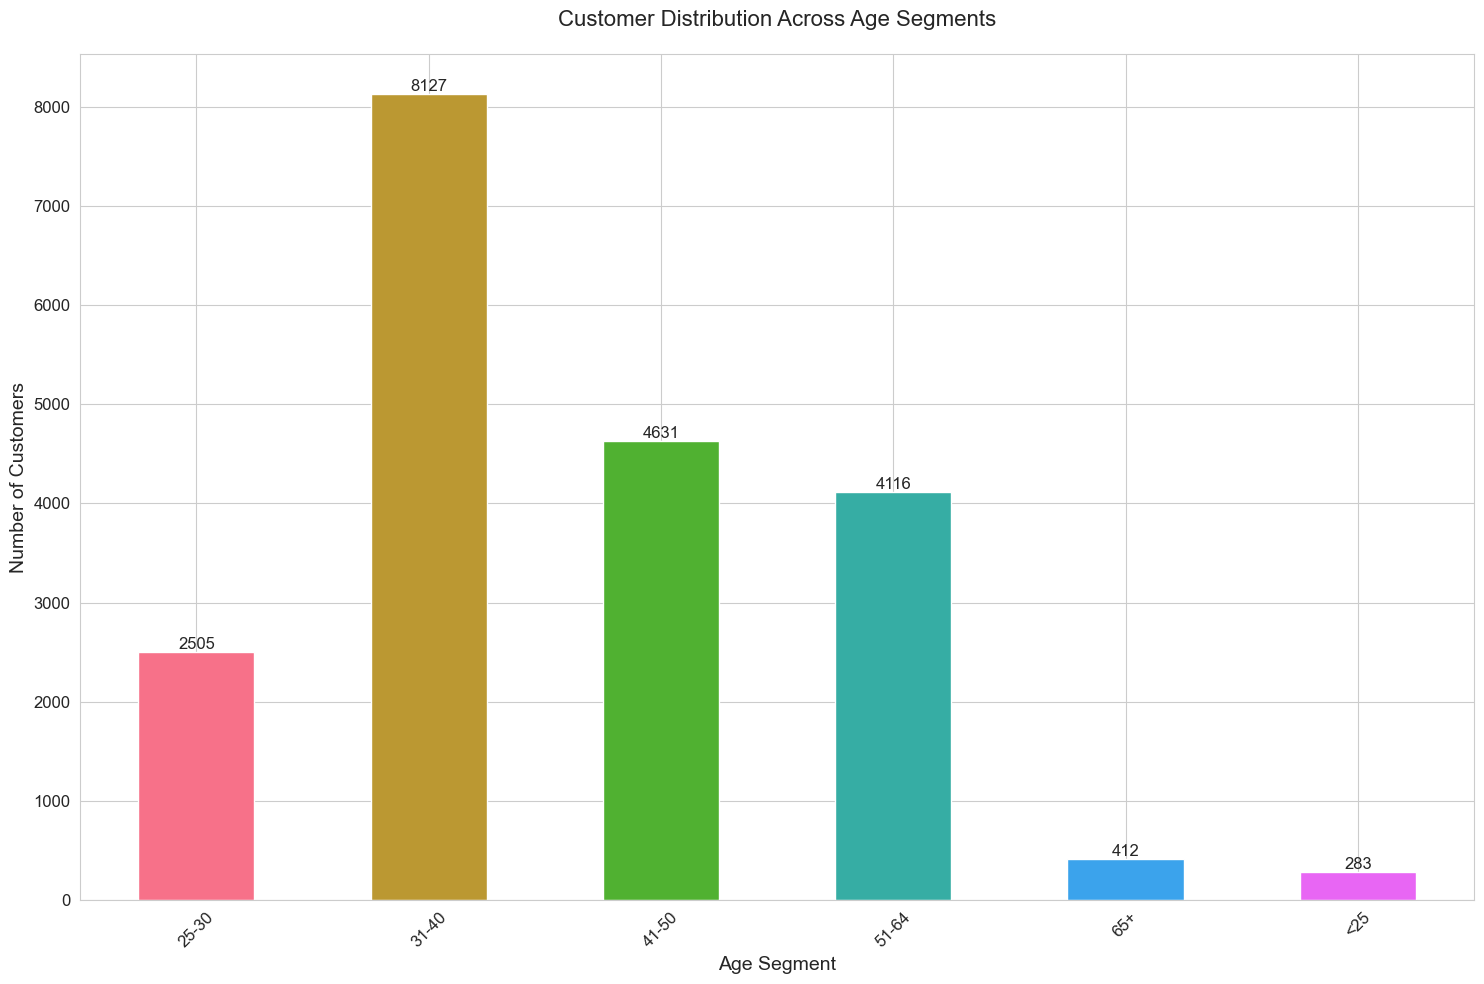

In [122]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Create customer count data
customer_counts = df['AGE_SEGMENT'].value_counts().sort_index()
colors = sns.color_palette("husl", n_colors=len(customer_counts))

# Create the plot
ax = customer_counts.plot(kind='bar', color=colors)
plt.title('Customer Distribution Across Age Segments', pad=20)
plt.xlabel('Age Segment')
plt.ylabel('Number of Customers')

# Add value labels on top of each bar
for i, v in enumerate(customer_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

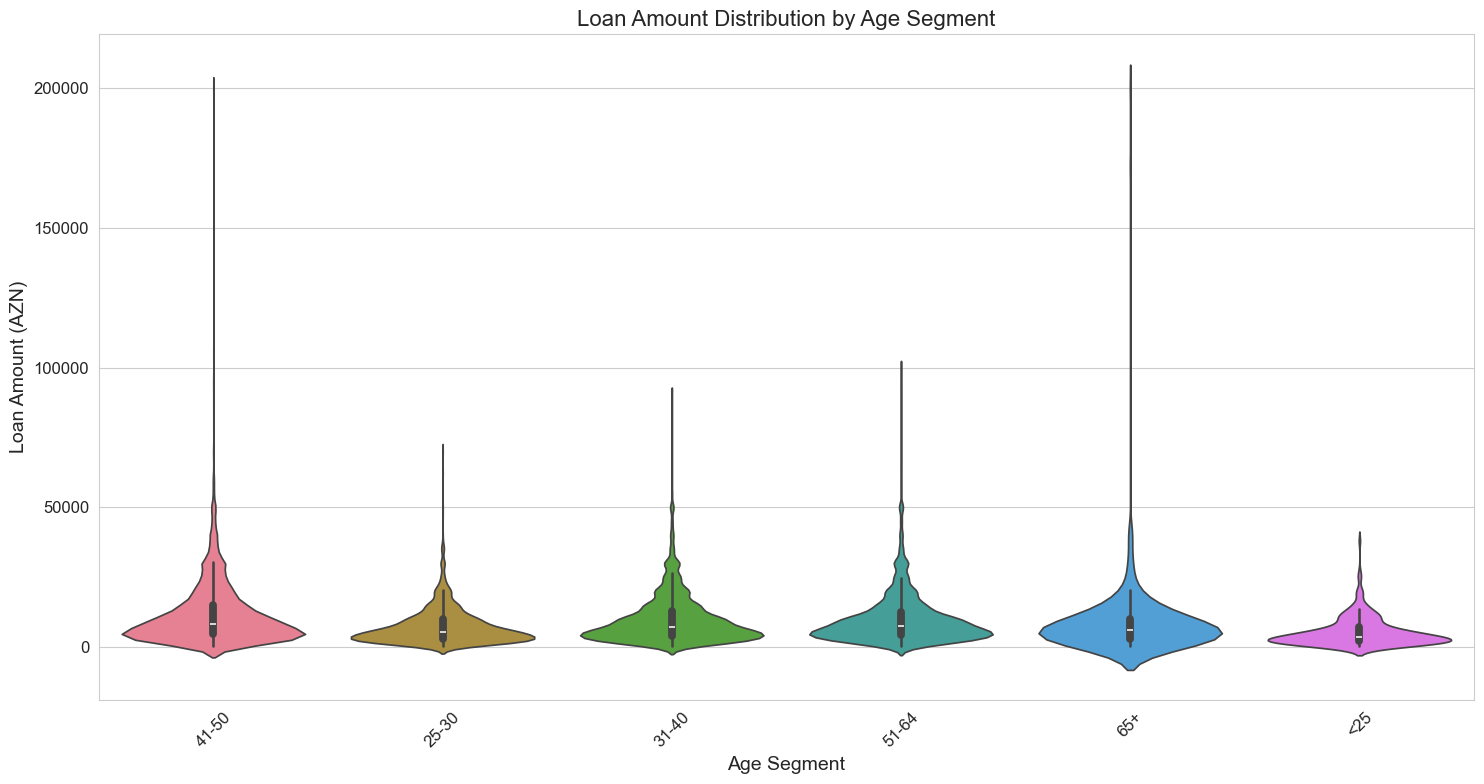

In [123]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df, x='AGE_SEGMENT', y='AMOUNT', palette='husl')
plt.title('Loan Amount Distribution by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Loan Amount (AZN)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


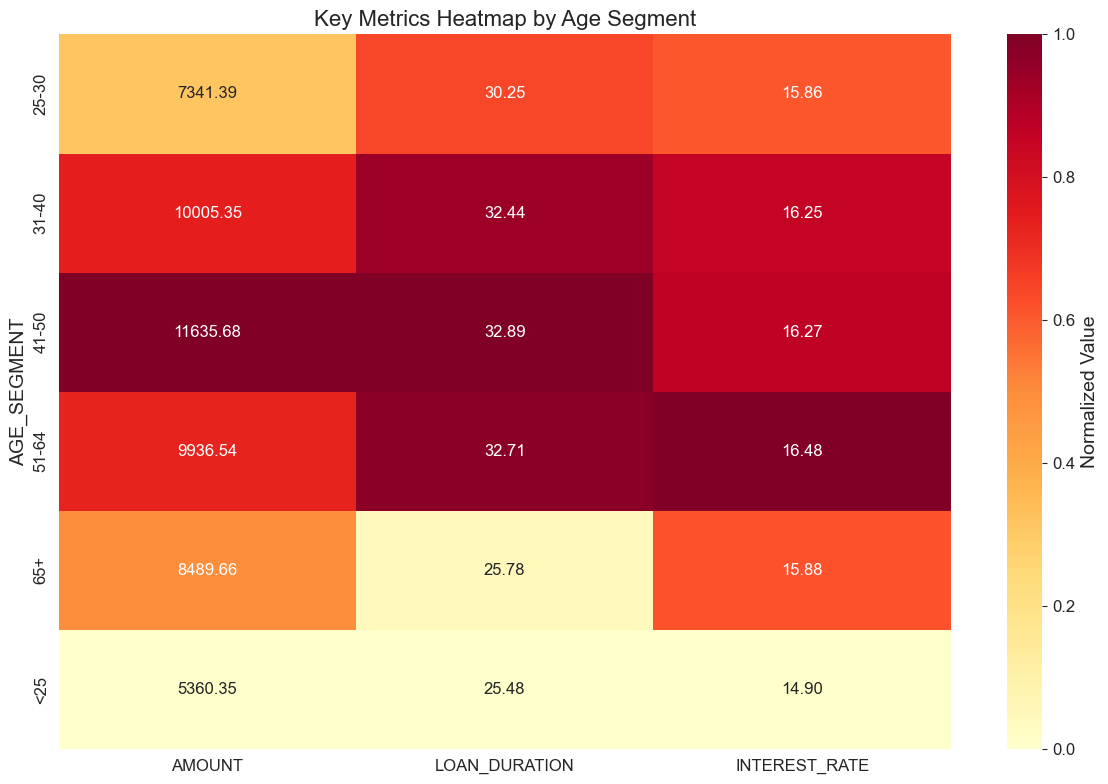

In [124]:
metrics_by_segment = df.groupby('AGE_SEGMENT').agg({
    'AMOUNT': 'mean',
    'LOAN_DURATION': 'mean',
    'INTEREST_RATE': 'mean'
}).round(2)

normalized_metrics = (metrics_by_segment - metrics_by_segment.min()) / (metrics_by_segment.max() - metrics_by_segment.min())

plt.figure(figsize=(12, 8))
sns.heatmap(normalized_metrics, annot=metrics_by_segment, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Normalized Value'})
plt.title('Key Metrics Heatmap by Age Segment')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

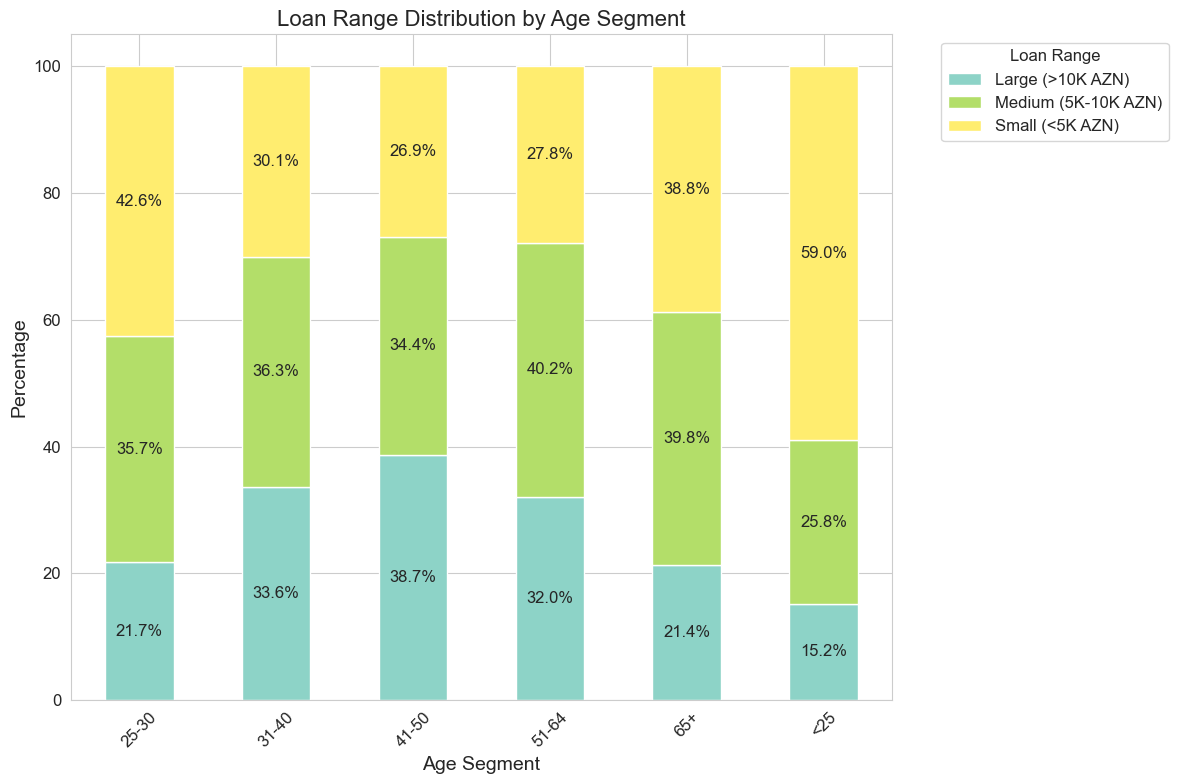

In [125]:
plt.figure(figsize=(15, 8))
loan_range_dist = pd.crosstab(df['AGE_SEGMENT'], df['LOAN_RANGE'], normalize='index') * 100

ax = loan_range_dist.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Loan Range Distribution by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Percentage')

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.legend(title='Loan Range', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

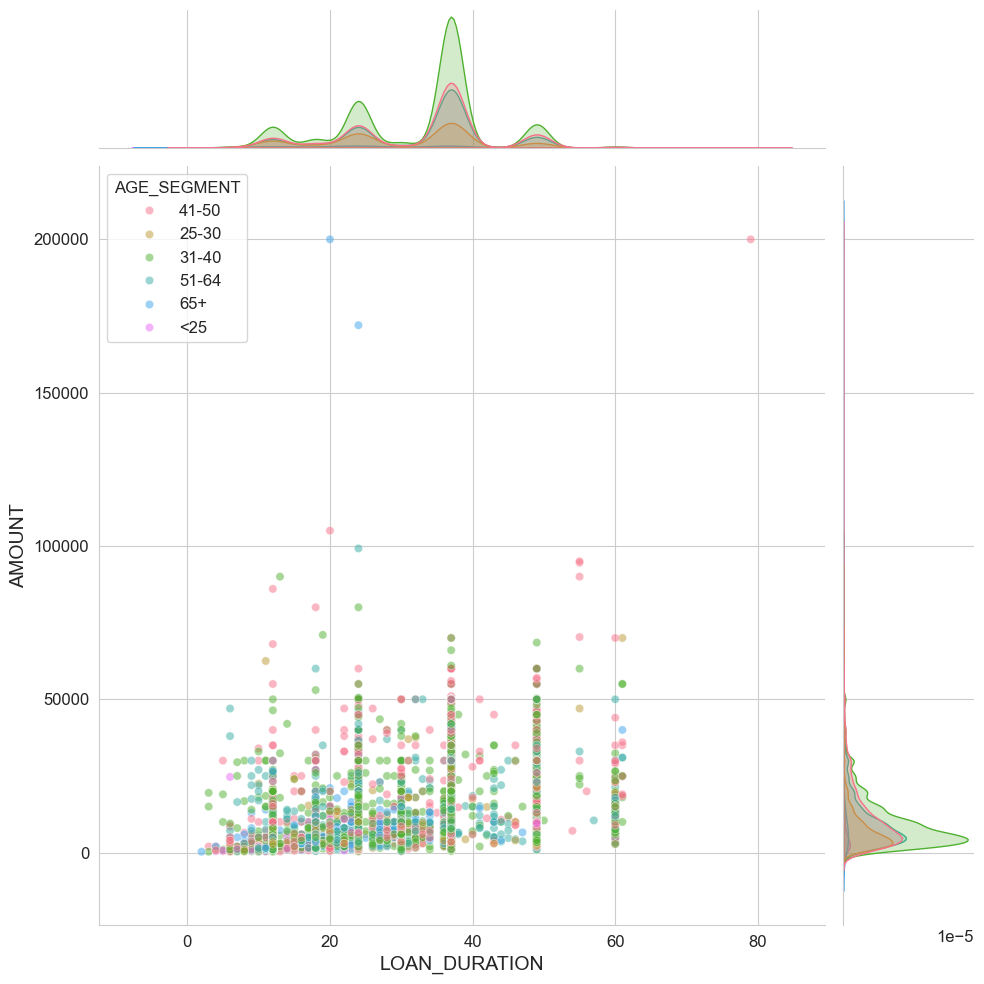


Segment Statistics:
            CUSTOMER_NO    AMOUNT                                     \
                  count      mean  median       std    min       max   
AGE_SEGMENT                                                            
25-30              2505   7341.39  5450.0   6380.48  300.0   70000.0   
31-40              8127  10005.35  7300.0   8753.78  300.0   90000.0   
41-50              4631  11635.68  8300.0  10955.79  310.0  200000.0   
51-64              4116   9936.54  7500.0   8567.83  300.0   99200.0   
65+                 412   8489.66  6000.0  14209.25  300.0  200000.0   
<25                 283   5360.35  3500.0   5096.99  300.0   38000.0   

            LOAN_DURATION               INTEREST_RATE        
                     mean median    std          mean   std  
AGE_SEGMENT                                                  
25-30               30.25   37.0  10.90         15.86  2.28  
31-40               32.44   37.0  10.23         16.25  2.27  
41-50               

In [126]:
plt.figure(figsize=(15, 8))
sns.jointplot(data=df, x='LOAN_DURATION', y='AMOUNT', hue='AGE_SEGMENT',
              kind='scatter', height=10, alpha=0.5)
plt.tight_layout()
plt.show()

segment_stats = df.groupby('AGE_SEGMENT').agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': ['mean', 'median', 'std', 'min', 'max'],
    'LOAN_DURATION': ['mean', 'median', 'std'],
    'INTEREST_RATE': ['mean', 'std']
}).round(2)

print("\nSegment Statistics:")
print(segment_stats)

### Behavioral Segmentation 

In [127]:
def get_loan_frequency(customer_loans):
    if customer_loans == 1:
        return 'One-time'
    elif customer_loans <= 3:
        return 'Occasional'
    else:
        return 'Frequent'

loan_frequency = df.groupby('CUSTOMER_NO').size().reset_index()
loan_frequency.columns = ['CUSTOMER_NO', 'loan_count']
loan_frequency['behavior_segment'] = loan_frequency['loan_count'].apply(get_loan_frequency)

df = df.merge(loan_frequency[['CUSTOMER_NO', 'behavior_segment']], on='CUSTOMER_NO', how='left')

behavioral_analysis = df.groupby('behavior_segment').agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': ['mean', 'median'],
    'LOAN_DURATION': 'mean',
    'INTEREST_RATE': 'mean'
}).round(2)

print("Behavioral Segment Analysis:")
print(behavioral_analysis)

Behavioral Segment Analysis:
                 CUSTOMER_NO    AMOUNT         LOAN_DURATION INTEREST_RATE
                       count      mean  median          mean          mean
behavior_segment                                                          
Frequent                 379  10649.00  6000.0         27.45         15.64
Occasional              4933  11537.86  8500.0         32.86         16.50
One-time               14762   9385.57  7000.0         31.95         16.15


### Value-Based Segmentation

In [128]:
def get_value_segment(amount):
    if amount < df['AMOUNT'].quantile(0.25):
        return 'Low Value'
    elif amount < df['AMOUNT'].quantile(0.75):
        return 'Medium Value'
    else:
        return 'High Value'

df['value_segment'] = df['AMOUNT'].apply(get_value_segment)

value_age_analysis = pd.crosstab([df['AGE_SEGMENT']], df['value_segment'], normalize='index') * 100
print("\nValue-Age Segment Distribution (%):")
print(value_age_analysis.round(2))


Value-Age Segment Distribution (%):
value_segment  High Value  Low Value  Medium Value
AGE_SEGMENT                                       
25-30               15.05      33.85         51.10
31-40               26.36      23.12         50.52
41-50               31.76      20.60         47.64
51-64               24.22      20.68         55.10
65+                 16.50      31.80         51.70
<25                  8.13      51.24         40.64


### Risk-Based Segmentation

In [129]:
df['risk_score'] = (
    (df['REMAIN_PERCENTAGE'] / 100 * 0.4) +
    (df['INTEREST_RATE'] / df['INTEREST_RATE'].max() * 0.3) +
    (df['LOAN_DURATION'] / df['LOAN_DURATION'].max() * 0.3)
)

def get_risk_segment(score):
    if score < 0.3:
        return 'Low Risk'
    elif score < 0.6:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['risk_segment'] = df['risk_score'].apply(get_risk_segment)
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,AGE,AGE_SEGMENT,REMAIN_PERCENTAGE,LOAN_DURATION,IS_ACTIVE,LOAN_RANGE,behavior_segment,value_segment,risk_score,risk_segment
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,...,40.826831,41-50,32.522500,37.0,True,Medium (5K-10K AZN),One-time,Medium Value,0.476458,Medium Risk
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,...,47.126626,41-50,0.000000,46.0,False,Medium (5K-10K AZN),Occasional,Medium Value,0.380546,Medium Risk
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,...,27.329227,25-30,0.000000,37.0,False,Medium (5K-10K AZN),Frequent,Medium Value,0.329817,Medium Risk
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,...,38.036961,31-40,0.000000,37.0,False,Medium (5K-10K AZN),One-time,Medium Value,0.347403,Medium Risk
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,...,35.337440,31-40,0.000000,37.0,False,Large (>10K AZN),Occasional,High Value,0.316368,Medium Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,54.614648,51-64,0.000000,37.0,False,Large (>10K AZN),One-time,High Value,0.326713,Medium Risk
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,36.982888,31-40,94.092941,37.0,True,Large (>10K AZN),Occasional,High Value,0.660671,High Risk
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,26.995209,25-30,96.785800,24.0,True,Medium (5K-10K AZN),One-time,Medium Value,0.611731,High Risk
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,65.566051,65+,54.034000,11.0,True,Small (<5K AZN),One-time,Low Value,0.397563,Medium Risk


### Product Preference Segmentation

In [130]:
product_preferences = df.groupby(['AGE_SEGMENT', 'PRODUCT_NAME']).agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': 'mean',
    'LOAN_DURATION': 'mean'
}).round(2)

print("\nProduct Preference Analysis:")
print(product_preferences)


Product Preference Analysis:
                                      CUSTOMER_NO    AMOUNT  LOAN_DURATION
AGE_SEGMENT PRODUCT_NAME                                                  
25-30       İstehlak kredit (Cash)           1637   7582.67          32.08
            İstehlak kredit - Online          796   6879.82          27.83
            İstehlak krediti                    2  58500.00          58.00
            Əmanətçi krediti                   70   5486.03          14.31
31-40       İstehlak kredit (Cash)           5670  10068.89          34.18
            İstehlak kredit - Online         2208   9661.31          29.68
            İstehlak krediti                   14  36160.71          50.21
            Əmanətçi krediti                  235  10146.69          15.45
41-50       İstehlak kredit (Cash)           3342  11807.27          34.54
            İstehlak kredit - Online         1118  11020.88          30.11
            İstehlak krediti                   16  40875.00          5

### Combination Segmentation

In [131]:
df['composite_segment'] = df.apply(lambda x: f"{x['AGE_SEGMENT']}_{x['value_segment']}_{x['risk_segment']}", axis=1)

composite_analysis = df.groupby('composite_segment').agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': 'mean',
    'LOAN_DURATION': 'mean',
    'INTEREST_RATE': 'mean'
}).round(2)

significant_segments = composite_analysis[composite_analysis['CUSTOMER_NO'] >= 100]
print("\nSignificant Composite Segments:")
print(significant_segments)


Significant Composite Segments:
                                CUSTOMER_NO    AMOUNT  LOAN_DURATION  \
composite_segment                                                      
25-30_High Value_High Risk              207  19247.25          41.21   
25-30_High Value_Medium Risk            130  19072.69          37.25   
25-30_Low Value_High Risk               123   2653.98          31.39   
25-30_Low Value_Low Risk                285   2066.60          18.90   
25-30_Low Value_Medium Risk             440   2290.26          23.54   
25-30_Medium Value_High Risk            425   7756.56          36.45   
25-30_Medium Value_Low Risk             197   6383.97          23.13   
25-30_Medium Value_Medium Risk          658   7079.85          33.00   
31-40_High Value_High Risk              802  22845.52          41.37   
31-40_High Value_Low Risk               197  23553.55          27.24   
31-40_High Value_Medium Risk           1143  20440.56          36.67   
31-40_Low Value_High Risk      

### Duration-Based Segmentation

In [132]:
def get_duration_segment(duration):
    if duration <= 12:
        return 'Short Term'
    elif duration <= 24:
        return 'Medium Term'
    else:
        return 'Long Term'

df['duration_segment'] = df['LOAN_DURATION'].apply(get_duration_segment)

duration_analysis = df.groupby(['duration_segment', 'AGE_SEGMENT']).agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': ['mean', 'median'],
    'INTEREST_RATE': 'mean'
}).round(2)

print("\nDuration-Based Segment Analysis:")
print(duration_analysis)


Duration-Based Segment Analysis:
                             CUSTOMER_NO    AMOUNT          INTEREST_RATE
                                   count      mean   median          mean
duration_segment AGE_SEGMENT                                             
Long Term        25-30              1415   9450.57   7850.0         17.04
                 31-40              5487  11833.21   9800.0         17.17
                 41-50              3176  13697.94  10000.0         17.15
                 51-64              2806  11533.55   9200.0         17.42
                 65+                 179  10084.25   8000.0         17.89
                 <25                 106   8379.43   7000.0         16.65
Medium Term      25-30               754   5397.45   4000.0         15.45
                 31-40              1893   7061.05   5000.0         15.26
                 41-50              1052   8111.68   5000.0         15.22
                 51-64               965   7371.98   5000.0         15.33
    

### Customer Lifecycle Value Segmentation

In [133]:
df['years_until_65'] = 65 - df['AGE']

df['potential_future_loans'] = (df['years_until_65'] / 3).clip(0)  # Assuming avg 3 years between loans
df['lifetime_value_potential'] = df['AMOUNT'] * (1 + df['potential_future_loans'] * 0.7)  # 0.7 probability factor

def get_ltv_segment(value):
    if value < df['lifetime_value_potential'].quantile(0.33):
        return 'Developing Value'
    elif value < df['lifetime_value_potential'].quantile(0.66):
        return 'Growing Value'
    else:
        return 'High Potential Value'

df['ltv_segment'] = df['lifetime_value_potential'].apply(get_ltv_segment)

ltv_analysis = df.groupby('ltv_segment').agg({
    'CUSTOMER_NO': 'count',
    'AMOUNT': 'mean',
    'lifetime_value_potential': 'mean',
    'years_until_65': 'mean'
}).round(2)
ltv_analysis

,CUSTOMER_NO,AMOUNT,lifetime_value_potential,years_until_65
ltv_segment,,,,
Developing Value,6625,3883.77,14898.19,17.83
Growing Value,6624,7429.03,44011.30,25.39
High Potential Value,6825,18250.87,129880.79,27.94


### Digital Engagement Segmentation (based on loan channel)

In [134]:
def get_channel_preference(product):
    if 'Online' in product:
        return 'Digital Native'
    elif 'Cash' in product:
        return 'Traditional'
    else:
        return 'Mixed'

df['channel_segment'] = df['PRODUCT_NAME'].apply(get_channel_preference)

digital_analysis = pd.crosstab([df['AGE_SEGMENT']], df['channel_segment'], normalize='index') * 100
digital_analysis

channel_segment,Digital Native,Mixed,Traditional
AGE_SEGMENT,,,
25-30,31.776447,2.874251,65.349301
31-40,27.168697,3.063861,69.767442
41-50,24.141654,3.692507,72.165839
51-64,17.638484,3.984451,78.377065
65+,3.883495,20.631068,75.485437
<25,42.756184,9.540636,47.703180


### Financial Sophistication Segmentation

In [135]:
df['sophistication_score'] = (
    (df['AMOUNT'] / df['AMOUNT'].max() * 0.3) +  # Size of financial commitment
    (df['LOAN_DURATION'] / df['LOAN_DURATION'].max() * 0.2) +  # Duration management
    ((df['REMAIN_AMOUNT'] == 0).astype(int) * 0.3) +  # Successful repayment
    (df['AGE'] / df['AGE'].max() * 0.2)  # Financial maturity
)

def get_sophistication_segment(score):
    if score < 0.4:
        return 'Emerging Financial User'
    elif score < 0.7:
        return 'Established Financial User'
    else:
        return 'Sophisticated Financial User'

df['sophistication_segment'] = df['sophistication_score'].apply(get_sophistication_segment)
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,risk_segment,composite_segment,duration_segment,years_until_65,potential_future_loans,lifetime_value_potential,ltv_segment,channel_segment,sophistication_score,sophistication_segment
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,...,Medium Risk,41-50_Medium Value_Medium Risk,Long Term,24.173169,8.057723,53123.248916,Growing Value,Traditional,0.200362,Emerging Financial User
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,...,Medium Risk,41-50_Medium Value_Medium Risk,Long Term,17.873374,5.957791,46534.086242,Growing Value,Traditional,0.539258,Established Financial User
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,...,Medium Risk,25-30_Medium Value_Medium Risk,Long Term,37.670773,12.556924,68528.929957,High Potential Value,Traditional,0.467557,Established Financial User
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,...,Medium Risk,31-40_Medium Value_Medium Risk,Long Term,26.963039,8.987680,36456.878850,Growing Value,Traditional,0.489392,Established Financial User
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,...,Medium Risk,31-40_High Value_Medium Risk,Long Term,29.662560,9.887520,190110.335387,High Potential Value,Traditional,0.511630,Established Financial User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,Medium Risk,51-64_High Value_Medium Risk,Long Term,10.385352,3.461784,48610.134611,Growing Value,Traditional,0.541641,Established Financial User
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,High Risk,31-40_High Value_High Risk,Long Term,28.017112,9.339037,128134.542551,High Potential Value,Digital Native,0.204947,Emerging Financial User
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,High Risk,25-30_Medium Value_High Risk,Medium Term,38.004791,12.668264,98677.846224,High Potential Value,Digital Native,0.138371,Emerging Financial User
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,Medium Risk,65+_Low Value_Medium Risk,Short Term,-0.566051,0.000000,1500.000000,Developing Value,Mixed,0.182168,Emerging Financial User


### Product Upgrade Potential Segmentation

In [136]:
df['payment_capacity'] = (df['AMOUNT'] / (df['LOAN_DURATION'] * df['INTEREST_RATE'])) * 100
df['successful_closure'] = df['CLOSE_DATE'].notna() & (df['REMAIN_AMOUNT'] == 0)

def get_upgrade_potential(row):
    if row['successful_closure'] and row['payment_capacity'] > df['payment_capacity'].median():
        return 'High Upgrade Potential'
    elif row['successful_closure']:
        return 'Moderate Upgrade Potential'
    else:
        return 'Basic Customer'

df['upgrade_segment'] = df.apply(get_upgrade_potential, axis=1)
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,years_until_65,potential_future_loans,lifetime_value_potential,ltv_segment,channel_segment,sophistication_score,sophistication_segment,payment_capacity,successful_closure,upgrade_segment
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,...,24.173169,8.057723,53123.248916,Growing Value,Traditional,0.200362,Emerging Financial User,1086.513649,False,Basic Customer
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,...,17.873374,5.957791,46534.086242,Growing Value,Traditional,0.539258,Established Financial User,983.176753,True,Moderate Upgrade Potential
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,...,37.670773,12.556924,68528.929957,High Potential Value,Traditional,0.467557,Established Financial User,1033.820706,True,Moderate Upgrade Potential
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,...,26.963039,8.987680,36456.878850,Growing Value,Traditional,0.489392,Established Financial User,675.675676,True,Moderate Upgrade Potential
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,...,29.662560,9.887520,190110.335387,High Potential Value,Traditional,0.511630,Established Financial User,3815.580286,True,High Upgrade Potential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,10.385352,3.461784,48610.134611,Growing Value,Traditional,0.541641,Established Financial User,2132.132132,True,High Upgrade Potential
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,28.017112,9.339037,128134.542551,High Potential Value,Digital Native,0.204947,Emerging Financial User,3305.463737,False,Basic Customer
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,38.004791,12.668264,98677.846224,High Potential Value,Digital Native,0.138371,Emerging Financial User,3229.974160,False,Basic Customer
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,-0.566051,0.000000,1500.000000,Developing Value,Mixed,0.182168,Emerging Financial User,1010.101010,False,Basic Customer


### Financial Goal-Based Segmentation

In [137]:
def infer_financial_goal(row):
    amount = row['AMOUNT']
    duration = row['LOAN_DURATION']
    age = row['AGE']
    
    if amount > 50000:
        return 'Major Investment'
    elif amount > 20000 and duration > 36:
        return 'Asset Building'
    elif amount < 5000 and duration < 12:
        return 'Short-term Needs'
    elif age < 30 and amount < 15000:
        return 'Career Establishment'
    else:
        return 'Lifestyle Enhancement'

df['financial_goal_segment'] = df.apply(infer_financial_goal, axis=1)
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,potential_future_loans,lifetime_value_potential,ltv_segment,channel_segment,sophistication_score,sophistication_segment,payment_capacity,successful_closure,upgrade_segment,financial_goal_segment
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,...,8.057723,53123.248916,Growing Value,Traditional,0.200362,Emerging Financial User,1086.513649,False,Basic Customer,Lifestyle Enhancement
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,...,5.957791,46534.086242,Growing Value,Traditional,0.539258,Established Financial User,983.176753,True,Moderate Upgrade Potential,Lifestyle Enhancement
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,...,12.556924,68528.929957,High Potential Value,Traditional,0.467557,Established Financial User,1033.820706,True,Moderate Upgrade Potential,Career Establishment
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,...,8.987680,36456.878850,Growing Value,Traditional,0.489392,Established Financial User,675.675676,True,Moderate Upgrade Potential,Lifestyle Enhancement
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,...,9.887520,190110.335387,High Potential Value,Traditional,0.511630,Established Financial User,3815.580286,True,High Upgrade Potential,Asset Building
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,3.461784,48610.134611,Growing Value,Traditional,0.541641,Established Financial User,2132.132132,True,High Upgrade Potential,Lifestyle Enhancement
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,9.339037,128134.542551,High Potential Value,Digital Native,0.204947,Emerging Financial User,3305.463737,False,Basic Customer,Lifestyle Enhancement
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,12.668264,98677.846224,High Potential Value,Digital Native,0.138371,Emerging Financial User,3229.974160,False,Basic Customer,Career Establishment
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,0.000000,1500.000000,Developing Value,Mixed,0.182168,Emerging Financial User,1010.101010,False,Basic Customer,Short-term Needs


### Cross-Sell Opportunity Segmentation

In [138]:
df['cross_sell_score'] = (
    (df['AGE'] / df['AGE'].max() * 0.2) +  # age factor
    (df['AMOUNT'] / df['AMOUNT'].max() * 0.3) +  # financial capacity
    ((df['REMAIN_AMOUNT'] == 0).astype(int) * 0.3) +  # good payment history
    (df['LOAN_DURATION'] / df['LOAN_DURATION'].max() * 0.2)  # relationship duration
)

def get_cross_sell_segment(score):
    if score < 0.3:
        return 'Basic Banking Products'
    elif score < 0.6:
        return 'Investment Products Potential'
    else:
        return 'Premium Services Candidate'

df['cross_sell_segment'] = df['cross_sell_score'].apply(get_cross_sell_segment)
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,...,ltv_segment,channel_segment,sophistication_score,sophistication_segment,payment_capacity,successful_closure,upgrade_segment,financial_goal_segment,cross_sell_score,cross_sell_segment
0,462598,1984-03-20,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,...,Growing Value,Traditional,0.200362,Emerging Financial User,1086.513649,False,Basic Customer,Lifestyle Enhancement,0.200362,Basic Banking Products
1,469638,1977-12-01,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,...,Growing Value,Traditional,0.539258,Established Financial User,983.176753,True,Moderate Upgrade Potential,Lifestyle Enhancement,0.539258,Investment Products Potential
2,489282,1997-09-18,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,...,High Potential Value,Traditional,0.467557,Established Financial User,1033.820706,True,Moderate Upgrade Potential,Career Establishment,0.467557,Investment Products Potential
3,490443,1987-01-03,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,...,Growing Value,Traditional,0.489392,Established Financial User,675.675676,True,Moderate Upgrade Potential,Lifestyle Enhancement,0.489392,Investment Products Potential
4,331469,1989-09-15,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,...,High Potential Value,Traditional,0.511630,Established Financial User,3815.580286,True,High Upgrade Potential,Asset Building,0.511630,Investment Products Potential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,1970-06-06,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,...,Growing Value,Traditional,0.541641,Established Financial User,2132.132132,True,High Upgrade Potential,Lifestyle Enhancement,0.541641,Investment Products Potential
20070,474877,1988-01-23,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,...,High Potential Value,Digital Native,0.204947,Emerging Financial User,3305.463737,False,Basic Customer,Lifestyle Enhancement,0.204947,Basic Banking Products
20071,812387,1998-01-18,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,...,High Potential Value,Digital Native,0.138371,Emerging Financial User,3229.974160,False,Basic Customer,Career Establishment,0.138371,Basic Banking Products
20072,202641,1959-06-24,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,...,Developing Value,Mixed,0.182168,Emerging Financial User,1010.101010,False,Basic Customer,Short-term Needs,0.182168,Basic Banking Products
